In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
mpl.rc('font', family='Malgun Gothic')

In [2]:
df1 = pd.read_csv('07_Data.csv')
df1['제품두께(float)'] = df1['제품두께'].replace({'415-515':4.15, 
                                         '417-518':4.17}).astype(float)

In [3]:
df1.columns

Index(['메세지', '발생시간', '조치시간', '정지시간', '정지시간2', '모델', '제품두께', '제품싸이즈', '작업구분',
       '작업자', '온도', '습도', '제품두께(float)'],
      dtype='object')

In [4]:
df1.head(10)

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도,제품두께(float)
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3,0.25
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3,0.25
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3,1.25
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3,2.25
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3,3.25
5,자재 픽업 에러,2015-06-17T07:41:58,2015-06-17T07:43:18,0시 01분 20초,79.768,78FBGA 7.5x11 CGHB08154 REV.5,4.25,415-519,야간,이은미,22.5,47.3,4.25
6,Door Open,2015-06-17T07:43:32,2015-06-17T07:43:40,0시 00분 08초,8.188,78FBGA 7.5x11 CGHB08154 REV.6,5.25,415-520,야간,이은미,22.5,47.3,5.25
7,자재 픽업 에러,2015-06-17T07:43:40,2015-06-17T07:44:30,0시 00분 50초,49.627,78FBGA 7.5x11 CGHB08154 REV.7,6.25,415-521,야간,이은미,22.5,47.3,6.25
8,Door Open,2015-06-17T07:44:44,2015-06-17T07:44:52,0시 00분 08초,7.984,78FBGA 7.5x11 CGHB08154 REV.8,7.25,415-522,야간,이은미,22.5,47.3,7.25
9,Door Open,2015-06-17T07:44:52,2015-06-17T07:45:06,0시 00분 14초,13.908,78FBGA 7.5x11 CGHB08154 REV.9,8.25,415-523,야간,이은미,22.5,47.3,8.25


# MISSION 6.

07_Data.csv 파일을 가져와 df1으로 선언해 아래와 같은 분석을 하고자 한다.  

1) df1 데이터에서 '메세지'의 빈도수를 확인

In [5]:
df1['메세지'].value_counts()

Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
초기화 Error          215
e-CIM 관련에러         133
메가진 Full           119
타임 오버               45
SYSTEM HANG UP      35
비젼 데이터               6
ITS 데이터              3
드라이버 알람              2
컨드롤러 알람              1
Name: 메세지, dtype: int64

2) 오류 '메세지'가 가장 많은 항목을 추출하여 df_error로 선언

In [6]:
most_error = df1['메세지'].value_counts().sort_values(ascending = False).index.to_list()[0]
cond1 = (df1['메세지']==most_error)
df_error = df1.loc[cond1]
df_error

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도,제품두께(float)
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3,0.25
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3,2.25
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3,3.25
6,Door Open,2015-06-17T07:43:32,2015-06-17T07:43:40,0시 00분 08초,8.188,78FBGA 7.5x11 CGHB08154 REV.6,5.25,415-520,야간,이은미,22.5,47.3,5.25
8,Door Open,2015-06-17T07:44:44,2015-06-17T07:44:52,0시 00분 08초,7.984,78FBGA 7.5x11 CGHB08154 REV.8,7.25,415-522,야간,이은미,22.5,47.3,7.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,Door Open,2015-06-24T11:57:09,2015-06-24T11:57:25,0시 00분 16초,15.941,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
2783,Door Open,2015-06-24T11:59:16,2015-06-24T11:59:26,0시 00분 10초,10.002,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
2786,Door Open,2015-06-24T12:23:40,2015-06-24T12:23:48,0시 00분 08초,7.970,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
2788,Door Open,2015-06-24T12:54:42,2015-06-24T12:55:08,0시 00분 26초,25.956,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN


3) df_error 데이터의 '작업구분' (주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균을 계산하여, result_error.csv 로 저장 

In [7]:
df_error.pivot_table(index='작업구분', values='정지시간2', aggfunc='mean').to_csv('result_error.csv')

4) df_error 데이터의 '작업구분' (주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균의 차이가 있는지 가설검정을 수행 

In [8]:
# 4-1) '정지시간2'에 대한 데이터가 정규성을 따르는가?
#       귀무가설 : 해당 데이터의 분포는 정규분포를 따른다
#       대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다
stats.normaltest(df_error['정지시간2'])
# P-value < 0.05 | 대립가설 참 | 해당 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=2647.03980170818, pvalue=0.0)

In [9]:
# 귀무가설 : 작업구분에 따른 정지시간2의 평균의 차이가 없다. 
# 대립가설 : 작업구분에 따른 정지시간2의 평균의 차이가 있다.
cond1 = (df_error['작업구분']=='주간')
cond2 = (df_error['작업구분']=='야간')
stats.ranksums(df_error.loc[cond1]['정지시간2'], df_error.loc[cond2]['정지시간2'])
# P.value > 0.05 / 귀무가설 참 / 작업구분에 따른 정지시간2의 평균의 차이가 없다.

RanksumsResult(statistic=1.663870780217619, pvalue=0.09613825542066314)

5) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계를 산점도로 시각화 하시오

<AxesSubplot:xlabel='제품두께(float)', ylabel='정지시간2'>

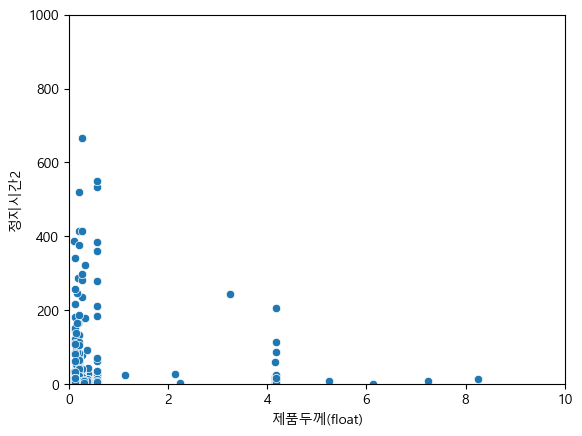

In [11]:
plt.ylim([0, 1000])
plt.xlim([0, 10])
sns.scatterplot(data=df_error, x='제품두께(float)', y='정지시간2')

6) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계가 있는지 가설검정을 수행

In [14]:
stats.normaltest(df_error['정지시간2'])

NormaltestResult(statistic=2647.03980170818, pvalue=0.0)

In [17]:
stats.normaltest(df_error['제품두께(float)'])

NormaltestResult(statistic=nan, pvalue=nan)

In [18]:
df_error2 = df_error.dropna()

In [19]:
print(stats.normaltest(df_error2['정지시간2']))
print(stats.normaltest(df_error2['제품두께(float)']))

NormaltestResult(statistic=1056.047139580023, pvalue=4.811464937787554e-230)
NormaltestResult(statistic=627.213616388511, pvalue=6.342985431902706e-137)


In [20]:
# 제품 두께에 따른 정지시간2가 서로 상관성이 있는가?
# 귀무 가설 : 제품 두께에 따른 정지시간2가 서로 상관성이 없다.
# 대립 가설 : 제품 두께에 따른 정지시간2가 서로 상관성이 있다.
stats.spearmanr(df_error2['정지시간2'], df_error2['제품두께(float)'])
# P-value > 0.05 | 귀무가설 참 | 두 연속형 자료는 서로 상관성이 없다.

SpearmanrResult(correlation=-0.04930074002078617, pvalue=0.25676477733540515)

08_Data.csv 데이터를 가져와 df3로 선언하여 아래와 같은 미션을 수행 

7) df3 데이터의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 확인

In [21]:
df3 = pd.read_csv('08_Data.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           311 non-null    object 
 1   Target         303 non-null    float64
 2   Etching1       311 non-null    float64
 3   Etching2       311 non-null    float64
 4   Etching3       311 non-null    float64
 5   CVD1           311 non-null    float64
 6   CVD2           311 non-null    float64
 7   CVD3           311 non-null    float64
 8   Photo1         311 non-null    float64
 9   Photo2         311 non-null    float64
 10  D2TI13027 24   311 non-null    float64
 11  D2TI13029 18   311 non-null    float64
 12  D2TI13029 19   311 non-null    float64
 13  D2TI13029 20   311 non-null    float64
 14  D2TI13030 1    311 non-null    float64
 15  D2TI13031 21   311 non-null    float64
 16  D2TI13032 16   311 non-null    float64
 17  D2TI13047 20   311 non-null    float64
 18  D2TI13050 

In [23]:
df3.describe().loc[['mean', '50%', 'std']]

,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,D2TI13027 24,...,D2TI17106 5,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11
mean,0.509241,32.638927,30.561051,0.071898,0.025756,0.012729,11.934937,15.923694,70.747232,202.257701,...,137.587040,119.354150,149.696091,149.708563,149.655876,149.628785,157.733457,128.021247,127.939578,190.976201
50%,0.400000,33.247881,30.400123,0.010473,0.010003,0.012625,0.069559,0.530937,70.964105,202.603585,...,134.370491,117.278060,150.139847,150.143612,150.106898,150.077834,160.073815,127.997058,127.990931,190.348197
std,0.471204,4.224098,7.865913,0.857433,0.264043,0.002208,12.718985,16.866122,5.053837,5.897030,...,8.345374,7.373823,2.982833,2.939580,2.890538,2.890104,3.175006,1.897572,0.983469,5.733196


8) df3 데이터에서 Etching1 에 해당하는 값을 34를 기준으로 분할  

    - Etching1이 34 이상이면 A  
    - Etching1이 34 미만이면 B 로 '분류'라는 새로운 변수로 선언

In [25]:
cond1 = (df3['Etching1'] >= 34)
df3.loc[cond1, '분류'] = 'A'   
df3.loc[~cond1, '분류'] = 'B'

9) df3에서 CVD1과 CVD2 데이터의 상관성이 있는지 분석하고자 한다.

    - CVD1값과 CVD2값의 산점도를 scatterplot으로 시각화 하시오

<AxesSubplot:xlabel='CVD1', ylabel='CVD2'>

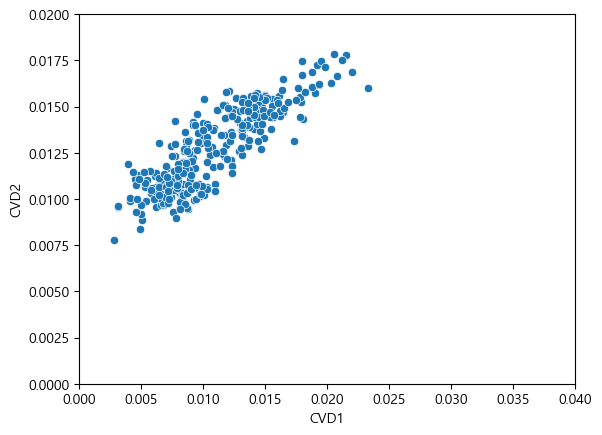

In [50]:
plt.ylim([0, 0.02])
plt.xlim([0, 0.04])
sns.scatterplot(data=df3, x='CVD1', y='CVD2')

    - '분류'에 따른 CVD1과 CVD2값을 산점도로 시각화 하시오 

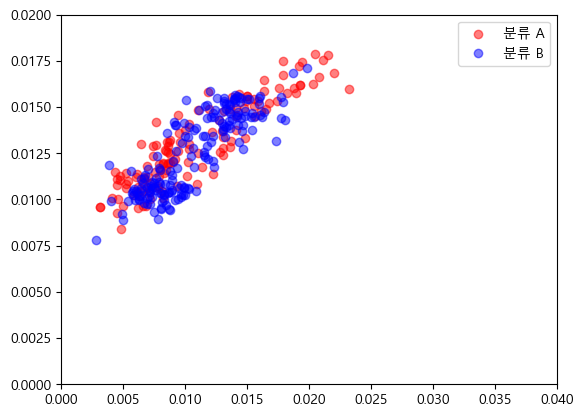

In [46]:
cond1 = (df3['분류'] == 'A')
cond2 = (df3['분류'] == 'B')
df3_A = df3.loc[cond1]
df3_B = df3.loc[cond2]
plt.scatter(df3_A['CVD1'], df3_A['CVD2'], color = 'red', alpha = 0.5, label = '분류 A')
plt.scatter(df3_B['CVD1'], df3_B['CVD2'], color = 'blue', alpha = 0.5, label = '분류 B')

plt.ylim([0, 0.02])
plt.xlim([0, 0.04])

plt.legend()
plt.show()

10) df3에서 Target값이 높은 상위 100개 데이터를 추출하여,

    - '분류'에 (A,B) 따른 CVD3의 평균의 유의미한 차이가 있는지 가설검정 
    -  결측값은 제거 후 검정 진행 / P.value 와 결론까지 작성

In [47]:
df3_target = df3.sort_values(by='Target', ascending=False).head(100)

In [57]:
print(df3_target.isnull().sum()['CVD3'])
print(df3_target.isnull().sum()['분류'])
# 결측값은 없다.

0
0


In [49]:
# 10-1) 'CVD3'에 대한 데이터가 정규성을 따르는가?
#        귀무가설 : 해당 데이터의 분포는 정규분포를 따른다
#        대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다
stats.normaltest(df3_target['CVD3'])
# P-value < 0.05 | 대립가설 참 | 해당 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=1015.157884834421, pvalue=3.641381470367694e-221)

In [53]:
# 102
# 귀무가설 : 분류에 따른 CVD3의 평균의 차이가 없다. 
# 대립가설 : 분류에 따른 CVD3의 평균의 차이가 있다.
cond1 = (df3_target['분류']=='A')
cond2 = (df3_target['분류']=='B')
stats.ranksums(df3_target.loc[cond1]['CVD3'], df3_target.loc[cond2]['CVD3'])
# P.value < 0.05 / 대립가설 참 / 분류에 따른 CVD3의 평균의 차이가 있다.

RanksumsResult(statistic=2.0892453131193944, pvalue=0.0366856463687836)

    - '분류'에 (A,B) 따른 CVD3값의 평균을 bar chart로 시각화

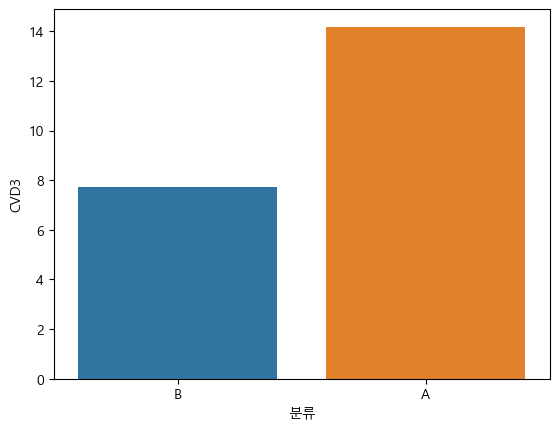

In [60]:
sns.barplot(data=df3_target, x="분류", y="CVD3", ci= None)
plt.show()

11) df3의 '분류'에 따른 'Photo1'값과 'Photo2'값의 합/최대/최소값을 계산 

In [62]:
df3.pivot_table(index='분류', values=['Photo1', 'Photo2'], aggfunc=['sum','max', 'min'])

sum                  max                  min              
         Photo1        Photo2 Photo1     Photo2    Photo1        Photo2
분류                                                                     
A   2020.854284   9129.070599   35.0  74.618795  0.003882  6.481900e+01
B   2931.414587  12873.318680   35.0  95.724768  0.003726  5.028307e-19

12) df3의 'DATE'항목을 날짜데이터로 변환하여, 'DATE_dt'로 선언한 뒤, 일자만 추출하여, 

    - '분류'에 따른 '일자'별 'Target'값의 합을 계산


In [67]:
df3['DATE_dt'] = pd.to_datetime(df3['DATE'])
df3['일자'] = df3['DATE_dt'].dt.day
df3.pivot_table(index='일자', columns='분류', values='Target', aggfunc='sum')

분류,A,B
일자,,
1,2.5,10.1
2,3.2,3.7
9,NaN,2.0
10,NaN,0.9
11,NaN,2.0
12,5.2,0.8
13,6.6,NaN
14,0.9,0.5
15,NaN,0.2
